In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, cos

## Exercitiul 1

Alegem o functie covenabila, astfel incat solutia f(x) = 0 sa fie sqrt(5). Am ales functia f(x) = x ^ 2 - 5.

Voi rezolva exercitiul cu metoda bisectiei.

In [2]:
def metoda_bisectiei(f, a, b, epsilon):
    N = int(np.log2((b - a) / epsilon) - 1)
    x_num = (a + b) / 2
    for i in range(1, N + 1):
        if f(x_num) == 0:
            break
        elif f(a) * f(x_num) < 0:
            b = x_num
        else:
            a = x_num
        x_num = (a + b) / 2
    
    return x_num

def afiseaza_f(f, a, b, titlu='Grafic'):
    x = np.arange(a, b, 0.01)
    plt.plot(x, f(x))
    
    if a * b <= 0:  # Afisam axa OY doar daca intervalul [a,b] cuprinde 0 (rol estetic)
        plt.axvline(0, c='black')
    plt.axhline(0, c='black') # Afisam axa OX
    plt.xlabel('x') # Label pentru axa OX
    plt.ylabel('y') # Label pentru axa OY
    plt.title(titlu) # Titlul figurii
    plt.show() # Arata graficul

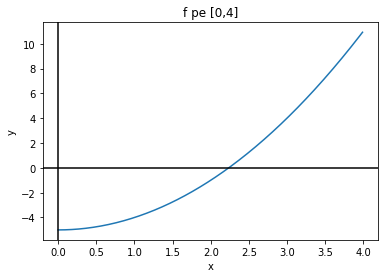

In [3]:
f = lambda x: x ** 2 - 5
epsilon = 1e-7

afiseaza_f(f, 0, 4, 'f pe [0,4]')

Se observa ca solutia este in intervalul (2, 2.5) (ne intereseaza doar solutia pozitiva).

In [356]:
sol = metoda_bisectiei(f, 2, 2.5, epsilon)
print('Solutia este: %.7f' %sol)

Solutia este: 2.2360679


## Exercitiul 2

e ^ (x - 2) = cos(e ^ (x-2)) + 1

este echivalent cu

e ^ (x - 2) - cos(e ^ (x - 2)) - 1 = 0

definim o functie astfel si cautam solutia

In [357]:
f2 = np.vectorize(lambda x: exp(x - 2) - cos(exp(x - 2)) - 1)  # fara vectorize nu merge

f2_1 = np.vectorize(lambda x: exp(x - 2))  # luam si functiile initiale pentru vizualizarea intersectiei
f2_2 = np.vectorize(lambda x: cos(exp(x - 2)) + 1)

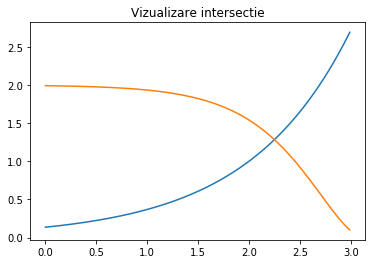

In [358]:
x = np.arange(0, 3, 0.01)  # am incercat cateva intervale diferite
plt.plot(x, f2_1(x))
plt.plot(x, f2_2(x))
plt.title('Vizualizare intersectie')
plt.show()

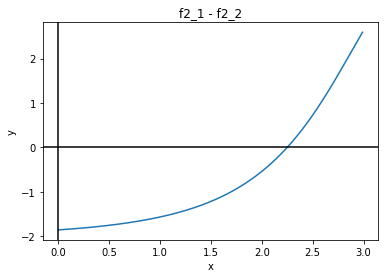

In [359]:
afiseaza_f(f2, 0, 3, 'f2_1 - f2_2')

Se observa ca solutia este in intervalul (2, 2.5). De asemenea, se observa si in primul grafic drept intersectia functiilor.

In [360]:
sol = metoda_bisectiei(f2, 2, 2.5, 1e-10)
print(f'Solutia este: {sol}')

Solutia este: 2.249535201000981


Prin rotunjire, raspunsul e 2.25.

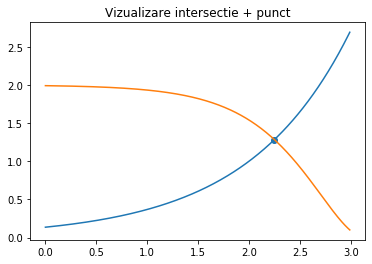

In [361]:
x = np.arange(0, 3, 0.01)
plt.plot(x, f2_1(x))
plt.plot(x, f2_2(x))
plt.scatter(sol, f2_1(sol))
plt.title('Vizualizare intersectie + punct')
plt.show()

Am afisat si punctul de intersectie dupa ce l-am aflat. (are mai mult rol de verificare).

## Exercitiul 3

In [6]:
def PozitieFalsa(f, a, b, epsilon):
    # rescriu de fiecare data variabilele, in loc sa am o lista de lungime k
    # pentru fiecare variabila (a, b, x)
    # (pentru ca algoritmul imi permite)
    x = (a * f(b) - b * f(a)) / (f(b) - f(a))
    N = 1
    while True:
        if abs(f(x)) < epsilon:
            break
        elif f(a) * f(x) < 0:
            b = x
        elif f(a) * f(x) > 0:
            a = x
        x_urm = (a * f(b) - b * f(a)) / (f(b) - f(a))
        
        if abs(x_urm - x) / abs(x) < epsilon:
            break
            
        x = x_urm
        N += 1

    return x, N

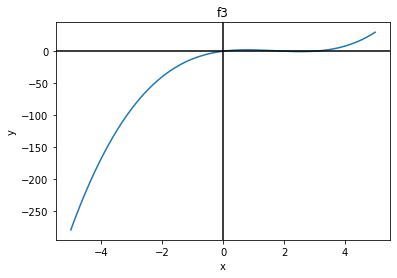

In [4]:
f3 = lambda x: x ** 3 - 5 * x ** 2 + 6 * x
afiseaza_f(f3, -5, 5, 'f3')

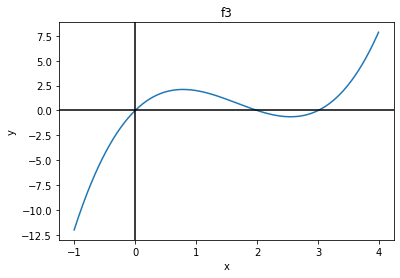

In [364]:
afiseaza_f(f3, -1, 4, 'f3')

Am restrans intervalul pentru putea vizualiza functia mai bine.
Alegem intervalele (-0.2, 0.2), (1.5, 2.2), (2.7, 3.5).

In [365]:
print(PozitieFalsa(f3, -0.2, 0.2, 1e-5))
print(PozitieFalsa(f3, 1.5, 2.3, 1e-5))
print(PozitieFalsa(f3, 2.7, 3.5, 1e-5))

(3.516058612229965e-07, 7)
(2.0000105353693556, 5)
(2.999960049675692, 11)


Prin rotunjire, solutiile sunt 0, 2 si 3.

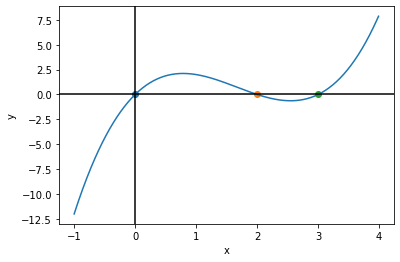

In [8]:
x = np.arange(-1, 4, 0.01)
plt.plot(x, f3(x))
plt.scatter(PozitieFalsa(f3, -0.2, 0.2, 1e-5)[0], 0)
plt.scatter(PozitieFalsa(f3, 1.5, 2.3, 1e-5)[0], 0)
plt.scatter(PozitieFalsa(f3, 2.7, 3.5, 1e-5)[0], 0)
plt.axvline(0, c='black')
plt.axhline(0, c='black')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Exercitiul 4

In [10]:
def Secanta(f, a, b, x0, x1, epsilon):
    # aceeasi idee ca la exercitiul 3 cu rescrierea variabilelor
    # la pasul k, x2 este x_k din algoritmul de la curs, x1 este x_k-1, iar x0 este x_k-2
    N = 0
    while True:
        if x0 == 0:  # verificam sa nu impartim la 0 la pasul urmator
            if abs(f(x0)) < epsilon:
                return x0, N
            else:
                print('Eroare. Impartire la 0')
                return None, None
        if abs(x1 - x0) / abs(x0) < epsilon:
            break
        x2 = (x0 * f(x1) - x1 * f(x0)) / (f(x1) - f(x0))
        if not a <= x2 <= b:
            print('Introduceti alte valori pentru x0, x1')
            return None, None
        x0 = x1
        x1 = x2
        
        N += 1
    return x1, N

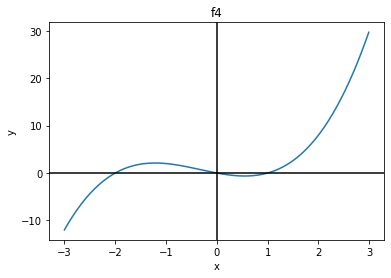

In [11]:
f4 = lambda x: x ** 3 + x ** 2 - 2 * x
afiseaza_f(f4, -3, 3, 'f4')

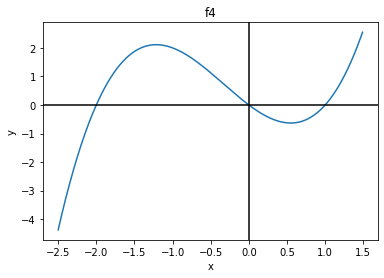

In [368]:
afiseaza_f(f4, -2.5, 1.5, 'f4')

Din nou, am restrans intervalul pentru a-l putea analiza.
Se observa intervalele (-2.3, -1.7), (-0.2, 0.2), (0.8, 1.2).

In [369]:
print(Secanta(f4, -2.3, -1.7, -2.3, -1.7, 1e-5))
print(Secanta(f4, -0.2, 0.2, -0.2, 0.2, 1e-5))
print(Secanta(f4, 0.8, 1.2, 0.8, 1.2, 1e-5))

(-1.999999999999013, 6)
(0.0, 9)
(1.0000000000003537, 6)


Prin rotunjire, solutiile sunt 2, 0 si 1.

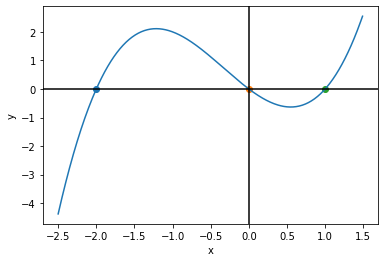

In [12]:
x = np.arange(-2.5, 1.5, 0.01)
plt.plot(x, f4(x))
plt.scatter(Secanta(f4, -2.3, -1.7, -2.3, -1.7, 1e-5)[0], 0)
plt.scatter(Secanta(f4, -0.2, 0.2, -0.2, 0.2, 1e-5)[0], 0)
plt.scatter(Secanta(f4, 0.8, 1.2, 0.8, 1.2, 1e-5)[0], 0)
plt.axvline(0, c='black')
plt.axhline(0, c='black')
plt.xlabel('x')
plt.ylabel('y')
plt.show()